<a href="https://colab.research.google.com/github/khushidubeyokok/AI-ML/blob/main/02_Unsupervised_learning/01_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMeans clustering algorithm
- K-Means is an unsupervised clustering algorithm that partitions data into K groups based on similarity, using distance as the measure
-  It works by randomly initializing K centroids, then iteratively performing two main steps:

  **assignment**, where each data point is assigned to the nearest centroid based on Euclidean distance, and **update**, where each centroid is recalculated as the mean of all points assigned to its cluster.

[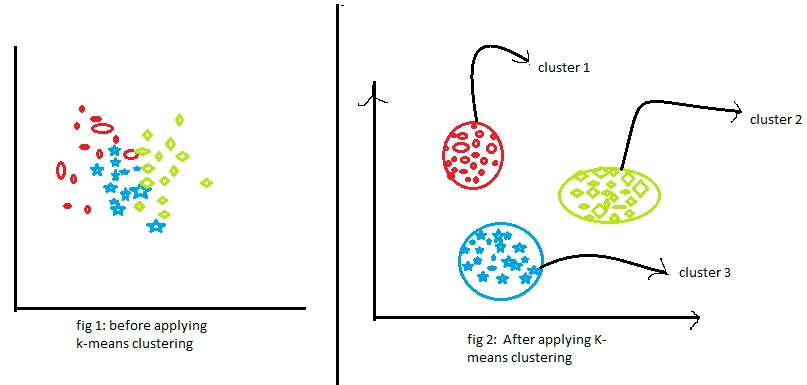link text](https://www.analyticsvidhya.com/blog/2020/10/a-simple-explanation-of-k-means-clustering/)

  ## Elbow method
  The elbow method helps choose the optimal number of clusters (K) by plotting the sum of squares error (SSE) against K. The point where the decrease in SSE starts to slow down sharply, forming an "elbow" is considered the best K.
  
  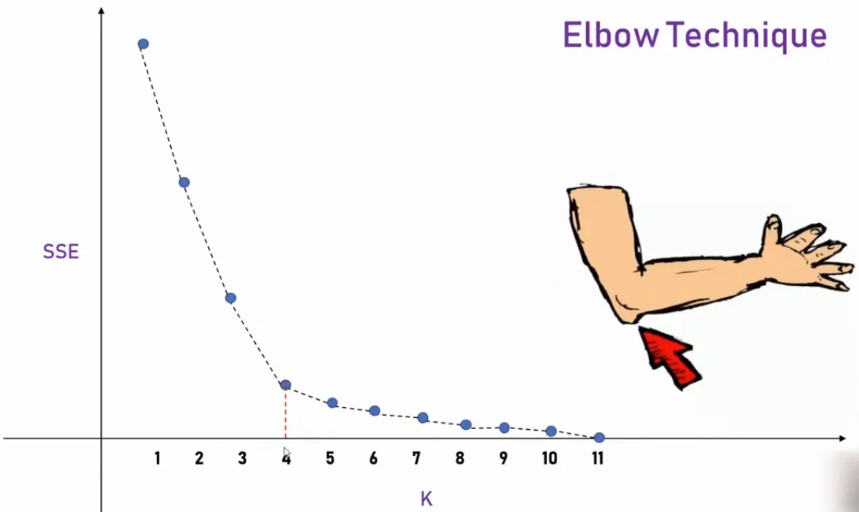



In this notebook we will apply KMeans on a custom dataset [Name,Age,Income]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler ##KMeans uses distance as measure hence scaling is important

In [ ]:
df=pd.read_csv('/content/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


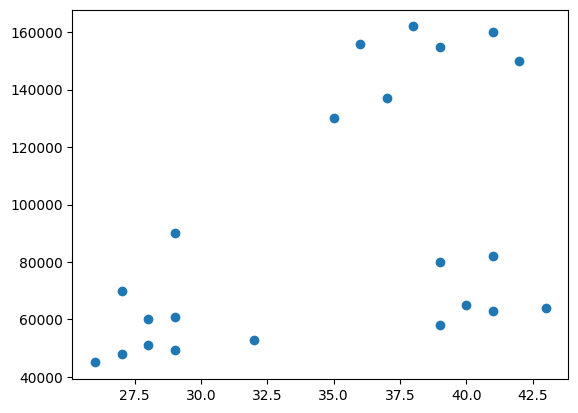

In [ ]:
plt.scatter(df['Age'],df['Income($)'])

The elbow method here gives k=2 instead of 3 because our data is not scaled

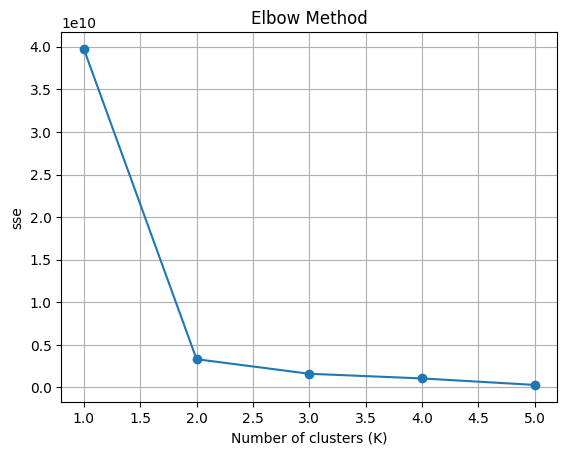

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []

# Try K values from 1 to 5
for k in range(1, 6):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df[['Age', 'Income($)']].values)
    sse.append(km.inertia_)  # Inertia = SSE

# Plot the elbow curve
plt.plot(range(1, 6), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('sse')
plt.grid(True)
plt.show()


In [ ]:
km=KMeans(n_clusters=3,random_state=42)
km

KMeans(n_clusters=3, random_state=42)

In [ ]:
y_pred=km.fit_predict(df[['Age', 'Income($)']].values)
y_pred

array([1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [ ]:
df['cluster']=y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


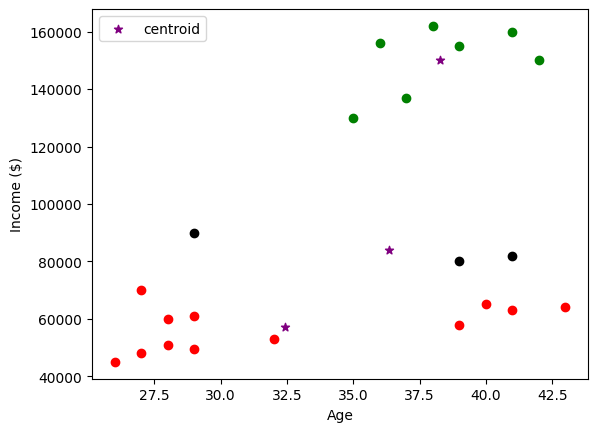

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

the plot is not well clustered because the data is not scaled

In [ ]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [ ]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


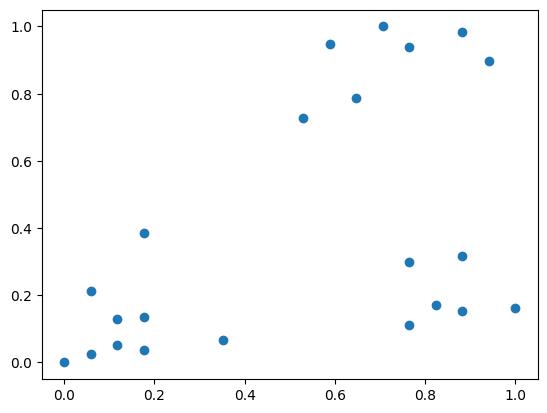

In [ ]:
plt.scatter(df['Age'],df['Income($)'])

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [ ]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

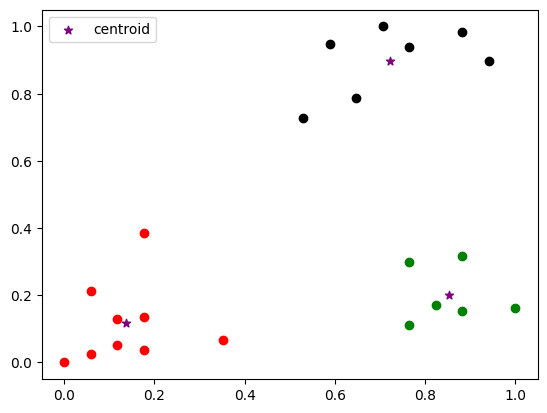

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

Elbow plot

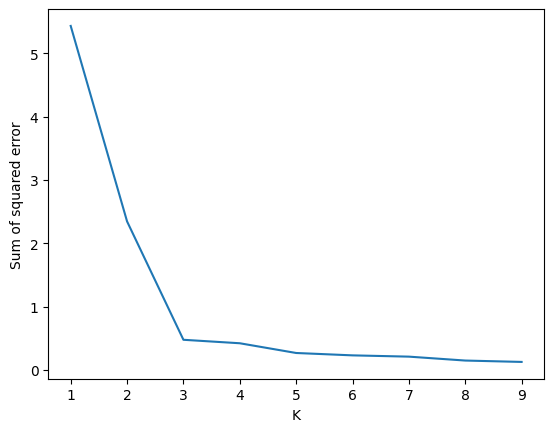

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_) #inertia=sse
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

Trying this with load_iris dataset

In [ ]:
from sklearn.datasets import load_iris
df=load_iris()

In [ ]:
dir(df)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

we will try plotting sepal length vs width

In [ ]:
y = df.target
X=df.data
X2d = X[:, :2]

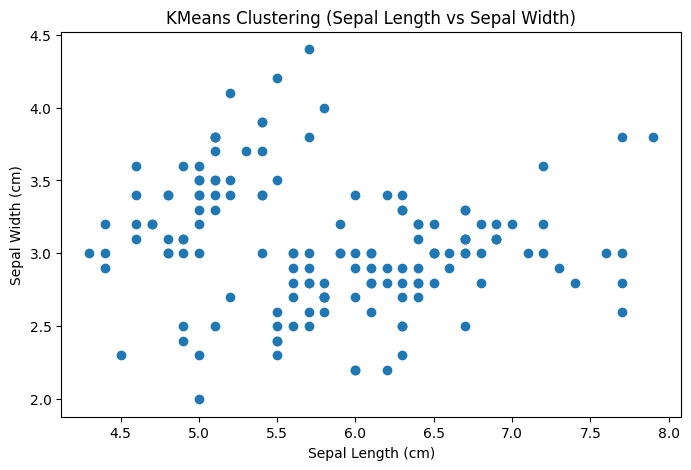

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(X2d[:, 0], X2d[:, 1])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('KMeans Clustering (Sepal Length vs Sepal Width)')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X2d)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [ ]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

In [ ]:
centers

array([[6.81276596, 3.07446809],
       [5.77358491, 2.69245283],
       [5.006     , 3.428     ]])

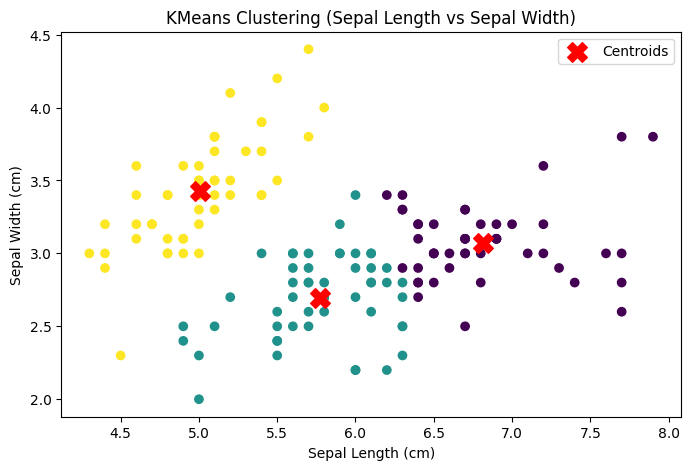

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(X2d[:, 0], X2d[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('KMeans Clustering (Sepal Length vs Sepal Width)')
plt.legend()
plt.show()

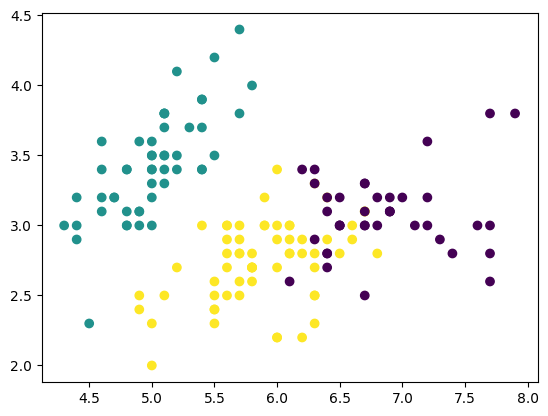

In [ ]:
kmeans.fit(X) #fitting model to all 4 features
labels = kmeans.labels_
centers=kmeans.cluster_centers_

# plotting only petal length vs width
X2d = X[:, [0, 1]]
plt.scatter(X2d[:, 0], X2d[:, 1], c=labels, cmap='viridis')